In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [117]:
def qubic_spline_coeff(x, y):
    n = len(x)
    h = [x[i+1] - x[i] for i in range (n-1)]
    
    a = np.array(y)
    
    A = np.zeros((n,n))
    
    for i in range(0, len(A)):
        if i == 0 or i == len(A) - 1:
            A[i][i] = 1
        else:
            A[i][i] = 2 * (h[i] + h[i-1])
    for i in range(0, len(A) - 1):
        if i == 0:
            A[i][i+1] = 0
        else:
            A[i][i+1] = h[i]
    for i in range(1, len(A) - 1):
        A[i][i-1] = h[i-1]
        
    B = np.zeros((n, 1))
    
    for i in range(len(B)):
        if i == 0 or i == len(B) - 1:
            B[i] = 0
        else:
            B[i] = 3 * (a[i+1] - a[i]) / h[i] - 3 * (a[i] - a[i-1]) / h[i-1]
    
    c = np.linalg.solve(A,B)
    d = np.array([(c[i+1] - c[i]) / (3*h[i]) for i in range(n-1)])
    b = np.array([(a[i+1] - a[i]) / h[i] - h[i]*(c[i+1] + 2*c[i])/3 for i in range(n-1)])
    
    QSC = np.zeros((5,n-1))
    
    for i in range(n-1):
        QSC[0][i] = a[i]
        QSC[1][i] = b[i]
        QSC[2][i] = c[i]
        QSC[3][i] = d[i]
        QSC[4][i] = x[i]
        
    return QSC

In [136]:
def qubic_spline(x, QSC):
    a = QSC[0]
    b = QSC[1]
    c = QSC[2]
    d = QSC[3]
    xi = QSC[4]
    
    if x <= xi[0]:
        i = 0
        return a[i] + b[i]*(x - xi[i]) + c[i]*(x - xi[i])**2 + d[i]*(x - xi[i])**3
    
    for i in range(1,len(xi)):
        if xi[i-1] <= x and x <= xi[i]:
            j = i - 1
            return a[j] + b[j]*(x - xi[j]) + c[j]*(x - xi[j])**2 + d[j]*(x - xi[j])**3
    if xi[-1] <= x:
        return a[-1] + b[-1]*(x - xi[-1]) + c[-1]*(x - xi[-1])**2 + d[-1]*(x - xi[-1])**3

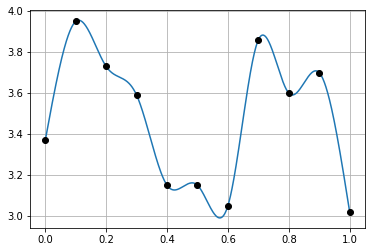

In [162]:
x = np.linspace(0,1,11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

x0 = np.linspace(0,1,1000)
y0 = np.array([qubic_spline(i, qubic_spline_coeff(x,y)) for i in x0])

plt.plot(x0, y0)
plt.plot(x, y, 'ko')
plt.grid()
plt.show()

In [105]:
def l_i(i, x, x_nodes):
    li = 1
    for j in range(len(x_nodes)):
        if j != i - 1:
            li = li*((x - x_nodes[j])/(x_nodes[i-1] - x_nodes[j]))
    return li

In [106]:
def L(x, x_nodes, y_nodes):
    L = 0
    for i in range(len(x_nodes)):
        L = L + y_nodes[i]*l_i(i + 1,x,x_nodes)
    return L

In [141]:
x = np.linspace(0,1,11)
X = np.array([[i + np.random.normal(0,0.01) for i in x] for j in range(1000)])

In [142]:
X

array([[ 0.00211185,  0.10017788,  0.19922404, ...,  0.79340931,
         0.89788993,  0.98723053],
       [-0.00262195,  0.08625006,  0.20015635, ...,  0.79646755,
         0.90339314,  0.99366594],
       [-0.0015312 ,  0.09313882,  0.19102682, ...,  0.80539948,
         0.9254232 ,  0.99794667],
       ...,
       [ 0.00347447,  0.10965481,  0.19905296, ...,  0.80497702,
         0.90281829,  1.00655261],
       [ 0.00218025,  0.10280777,  0.20519512, ...,  0.79916315,
         0.8836728 ,  0.97891156],
       [ 0.00444992,  0.09483764,  0.1985664 , ...,  0.80210829,
         0.92672891,  1.00262256]])

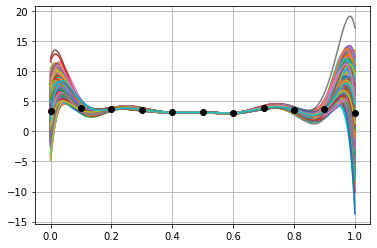

In [69]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

X = np.array([[i + np.random.normal(0, 0.01) for i in x] for j in range(N)])

for j in range(N):
    plt.plot(np.linspace(0,1,1000), [L(i, X[j], y) for i in np.linspace(0,1,1000)])
    
plt.plot(x, y, 'ko')
plt.grid()
plt.show()

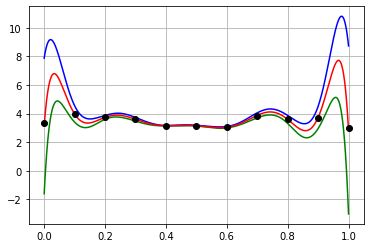

In [144]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

X = np.array([[i + np.random.normal(0, 0.01) for i in x] for j in range(N)])
Y = [[L(i, X[j], y) for i in np.linspace(0, 1, 1000)] for j in range(N)]

h_l = np.linspace(0, 1, 1000)
h_u = np.linspace(0, 1, 1000)
aver_inter = np.linspace(0, 1, 1000)

for i in range(1000):
    slc = [Y[j][i] for j in range(N)]
    c_i = st.norm.interval(0.9, np.mean(slc), np.std(slc))
    h_l[i] = c_i[0]
    h_u[i] = c_i[1]
    aver_inter[i] = np.mean(slc)
    
plt.plot(np.linspace(0, 1, 1000), h_l, 'g')
plt.plot(np.linspace(0, 1, 1000), h_u, 'b')
plt.plot(np.linspace(0, 1, 1000), aver_inter, 'r')
plt.plot(x, y, 'ko')
plt.grid()
plt.show()

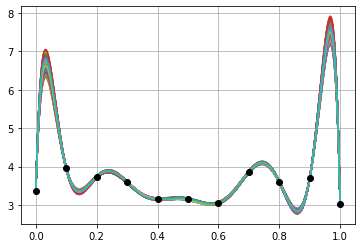

In [150]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

Y = np.array([[i + np.random.normal(0,0.01) for i in y] for j in range(N)])

for j in range(N):
    plt.plot(np.linspace(0, 1, 1000), [L(i, x, Y[j]) for i in np.linspace(0,1, 1000)])
    
plt.plot(x, y, 'ko')
plt.grid()             
plt.show()

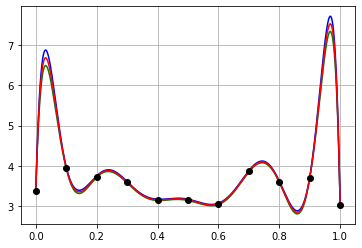

In [146]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

Y = np.array([[i + np.random.normal(0,0.01) for i in y] for j in range(N)])
Y0 = [[L(i, x, Y[j]) for i in np.linspace(0, 1, 1000)] for j in range(N)]

h_l = np.linspace(0, 1, 1000)
h_u = np.linspace(0, 1, 1000)
aver_inter = np.linspace(0, 1, 1000)

for i in range(1000):
    slc = [Y0[j][i] for j in range(N)]
    c_i = st.norm.interval(0.9, loc=np.mean(slc), scale=np.std(slc))
    h_l[i] = c_i[0]
    h_u[i] = c_i[1]
    aver_inter[i] = np.mean(slc)
    
plt.plot(np.linspace(0, 1, 1000), h_l, 'g')
plt.plot(np.linspace(0, 1, 1000), h_u, 'b')
plt.plot(np.linspace(0, 1, 1000), aver_inter, 'r')
plt.plot(x, y, 'ko')
plt.grid()             
plt.show()

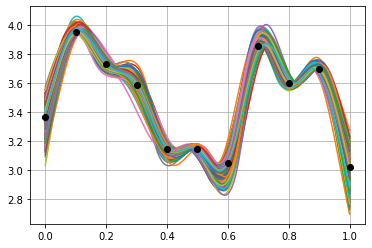

In [147]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

X = np.array([[i + np.random.normal(0, 0.01) for i in x] for j in range(N)])
Y = [[qubic_spline(i, qubic_spline_coeff(X[j], y)) for i in np.linspace(0, 1, 1000)] for j in range(N)]

for j in range(N):
    plt.plot(np.linspace(0, 1, 1000), Y[j])
    
plt.plot(x, y, 'ko')
plt.grid()             
plt.show()

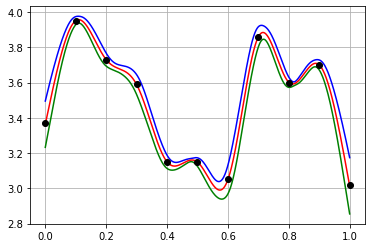

In [148]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

X = np.array([[i + np.random.normal(0, 0.01) for i in x] for j in range(N)])
Y = [[qubic_spline(i, qubic_spline_coeff(X[j], y)) for i in np.linspace(0, 1, 1000)] for j in range(N)]


h_l = np.linspace(0, 1, 1000)
h_u = np.linspace(0, 1, 1000)
aver_inter = np.linspace(0, 1, 1000)

for i in range(1000):
    slc = [Y[j][i] for j in range(N)]
    c_i = st.norm.interval(0.9, loc=np.mean(slc), scale=np.std(slc))
    h_l[i] = c_i[0]
    h_u[i] = c_i[1]
    aver_inter[i] = np.mean(slc)
    
plt.plot(np.linspace(0, 1, 1000), h_l, 'g')
plt.plot(np.linspace(0, 1, 1000), h_u, 'b')
plt.plot(np.linspace(0, 1, 1000), aver_inter, 'r')
plt.plot(x, y, 'ko')
plt.grid()             
plt.show()

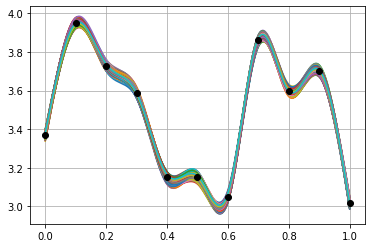

In [161]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

Y = np.array([[i + np.random.normal(0,0.01) for i in y] for j in range(N)])

for j in range(N):
    plt.plot(np.linspace(0, 1, 1000), [qubic_spline(i, qubic_spline_coeff(x, Y[j])) for i in np.linspace(0,1, 1000)])
    
plt.plot(x, y, 'ko')
plt.grid()             
plt.show()

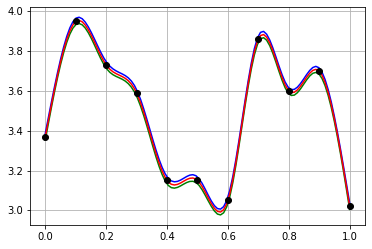

In [160]:
N = 1000
x = np.linspace(0, 1, 11)
y = [3.37,3.95,3.73,3.59,3.15,3.15,3.05,3.86,3.60, 3.70, 3.02]

Y = np.array([[i + np.random.normal(0,0.01) for i in y] for j in range(N)])
Y0 = [[qubic_spline(i, qubic_spline_coeff(x, Y[j])) for i in np.linspace(0, 1, 1000)] for j in range(N)]


h_l = np.linspace(0, 1, 1000)
h_u = np.linspace(0, 1, 1000)
aver_inter = np.linspace(0, 1, 1000)

for i in range(1000):
    slc = [Y0[j][i] for j in range(N)]
    c_i = st.norm.interval(0.9, loc=np.mean(slc), scale=np.std(slc))
    h_l[i] = c_i[0]
    h_u[i] = c_i[1]
    aver_inter[i] = np.mean(slc)
    
plt.plot(np.linspace(0, 1, 1000), h_l, 'g')
plt.plot(np.linspace(0, 1, 1000), h_u, 'b')
plt.plot(np.linspace(0, 1, 1000), aver_inter, 'r')
plt.plot(x, y, 'ko')
plt.grid()             
plt.show()